In [1]:
# Mount
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/CS7643-project/scripts"
%load_ext autoreload
%autoreload 2

/content/drive/MyDrive/CS7643-project/scripts


In [3]:
# Install required packages
%cd "/content/drive/MyDrive/CS7643-project/scripts"
!pip install -r requirements.txt

/content/drive/MyDrive/CS7643-project/scripts
     |████████████████████████████████| 42 kB 580 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 31.2 MB 59.2 MB/s 
     |████████████████████████████████| 130 kB 47.8 MB/s 
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=156423 sha256=68cb0c7a4dcb5e4910e2b866996d901bd593e8c335cf88bde2258d67dfcc4638
  Stored in directory: /root/.cache/pip/wheels/c9/c0/d4/29d797817e268124a32b6cf8beb8b8fe87b86f099d5a049e61
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5710 sha256=50d72f257d8245f9a6fbb040f186e85bd2ce871b4a8ec2853074748dc4ff9546
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
  Created wheel for torchwordemb: filename=torchwordemb-0.0.9-cp37-cp37m-linux_x86_64.whl size=2127604 sha256=4028a42255a7a556

In [ ]:
from data_loader import ImagerLoader
import torch.utils.data
import torchvision.transforms as transforms

In [ ]:
train_loader = torch.utils.data.DataLoader(
    ImagerLoader('../data/images/',
                 transforms.Compose([
                     transforms.Scale(256),
                     transforms.CenterCrop(256),
                     transforms.RandomCrop(224),
                     transforms.RandomHorizontalFlip(),
                     transforms.ToTensor(),               
                 ]), data_path='../data/', partition='train', sem_reg=False),
                 batch_size=2, shuffle=False, num_workers=1, pin_memory=True
)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [ ]:
it = iter(train_loader)
input, target = next(it)

torch.Size([3, 224, 224])


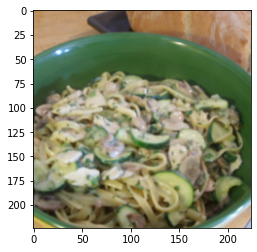

In [ ]:
import matplotlib.pyplot as plt
print(input[0][0].shape)
plt.imshow(input[0][0].permute(1, 2, 0))

In [ ]:
from recipe_model_vgg import JointEmbeddingModel
model = JointEmbeddingModel()
output = model(*input)
print([output[i].shape for i in range(len(output))])

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

RuntimeError: ignored

In [ ]:
!python train_vgg2.py -batch_size 16 -n_workers 4 -epoch 10 -valfreq 5 -medr 200 -img_feature 25088 -early_stop 500 -checkpoint_path ./snapshot_vgg/ -train_loss_output ./results_vgg/run1_train_loss.txt -val_loss_output ./results_vgg/run1_val_loss.txt -val_recall_output ./results_vgg/run1_val_recall.txt

Using GPU...
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100% 548M/548M [00:10<00:00, 53.5MB/s]
Starting from 0 epoch...
Training loader prepared.
Validation loader prepared.
Epoch 000, iteration      19, data loading time: 0.0001
Epoch 000, iteration      19, batch time: 0.1721
Epoch 000, iteration      39, data loading time: 0.0001
Epoch 000, iteration      39, batch time: 0.1742
Epoch 000, iteration      59, data loading time: 0.0001
Epoch 000, iteration      59, batch time: 0.1752
Epoch 000, iteration      79, data loading time: 0.0001
Epoch 000, iteration      79, batch time: 0.1782
Epoch 000, iteration      99, data loading time: 0.0002
Epoch 000, iteration      99, batch time: 0.1748
Epoch 000, iteration     119, data loading time: 0.0001
Epoch 000, iteration     119, batch time: 0.1756
Epoch 000, iteration     139, data loading time: 0.0001
Epoch 000, iteration     139, batch time: 0.1780
E

In [4]:
!python train_vgg2.py -batch_size 16 -n_workers 8 -epoch 100 -valfreq 5 -medr 200 -img_feature 25088 -early_stop 500 -resume_path ./snapshot_vgg/model_epoch_085_val_53.000.pth.tar -checkpoint_path ./snapshot_vgg/ -train_loss_output ./results_vgg/run1_train_loss.txt -val_loss_output ./results_vgg/run1_val_loss.txt -val_recall_output ./results_vgg/run1_val_recall.txt

Using GPU...
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100% 548M/548M [00:09<00:00, 60.1MB/s]
Loading checkpoint ./snapshot_vgg/model_epoch_085_val_53.000.pth.tar
Finish loading...
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Training loader prepared.
Validation loader prepared.
Epoch 085, iteration      19, data loading time: 0.0001
Epoch 085, iteration      19, batch time: 0.1750
Epoch 085, iteration      39, data loading time: 0.0002
Epoch 085, iteration      39, batch time: 0.1768
Epoch 08